### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('AutoData.csv')
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Perform data cleanup as required

In [7]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.loc[data.duplicated()]

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no missing values in the dataset.
The variables are in the correct format, except 'symboling'. It should be in category format.
In make column we have to separate Car Company Name and check their spelling

In [9]:
data['symboling'] = data.symboling.astype(object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
data['CompanyName'] = data['make'].apply(lambda x : x.split(' ')[0])
data.drop('make',axis= 1,inplace = True)

In [12]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some spelling error in the CompanyName column.

    1. maxda = mazda
    2. Nissan = nissan
    3. porsche = porcshce
    4. toyouta = toyouta
    5. vokswagen = vw = volkswagen

In [13]:
data['CompanyName'].replace('maxda','mazda', inplace = True)
data['CompanyName'].replace('Nissan','nissan', inplace = True)
data['CompanyName'].replace('porcshce','porsche', inplace = True)
data['CompanyName'].replace('toyouta','toyota', inplace = True)
data['CompanyName'].replace('vokswagen','volkswagen', inplace = True)
data['CompanyName'].replace('vw','volkswagen', inplace = True)

In [14]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Perform EDA on the data

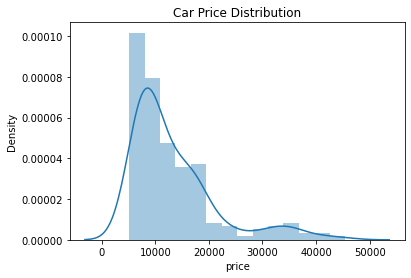

In [15]:
sns.distplot(data['price'])
plt.title('Car Price Distribution')
plt.show()

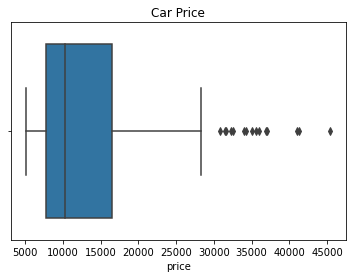

In [16]:
sns.boxplot(data['price'])
plt.title('Car Price')
plt.show()

The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

<AxesSubplot:xlabel='fueltype', ylabel='count'>

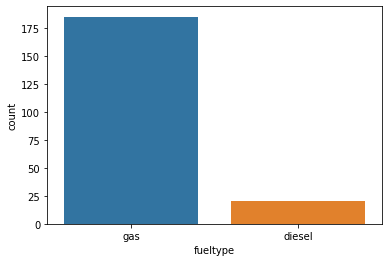

In [17]:
sns.countplot(data['fueltype'])

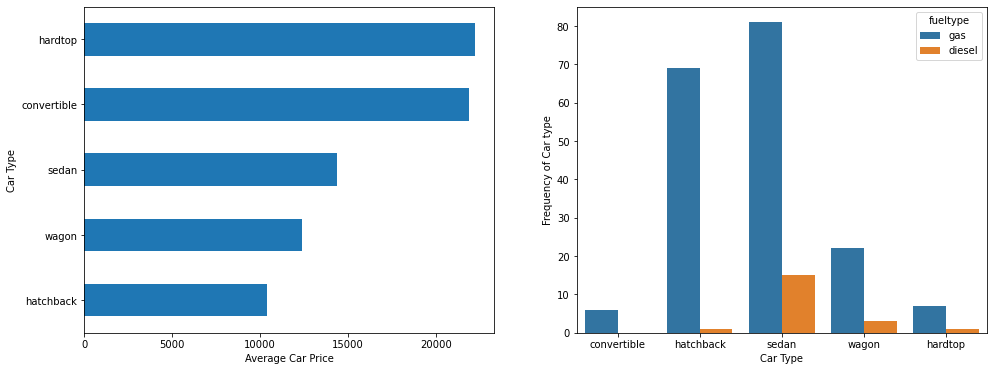

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
data.groupby(by= 'carbody')['price'].mean().sort_values(ascending=True).plot.barh()
plt.xlabel("Average Car Price")
plt.ylabel('Car Type')

plt.subplot(1,3,2)
sns.countplot(data['carbody'],hue = data.fueltype).set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

1. Sedan car type are the most sold cars.
2. Hardtop and Convertible have the highest price.
3. There are very less car which consume diesel.

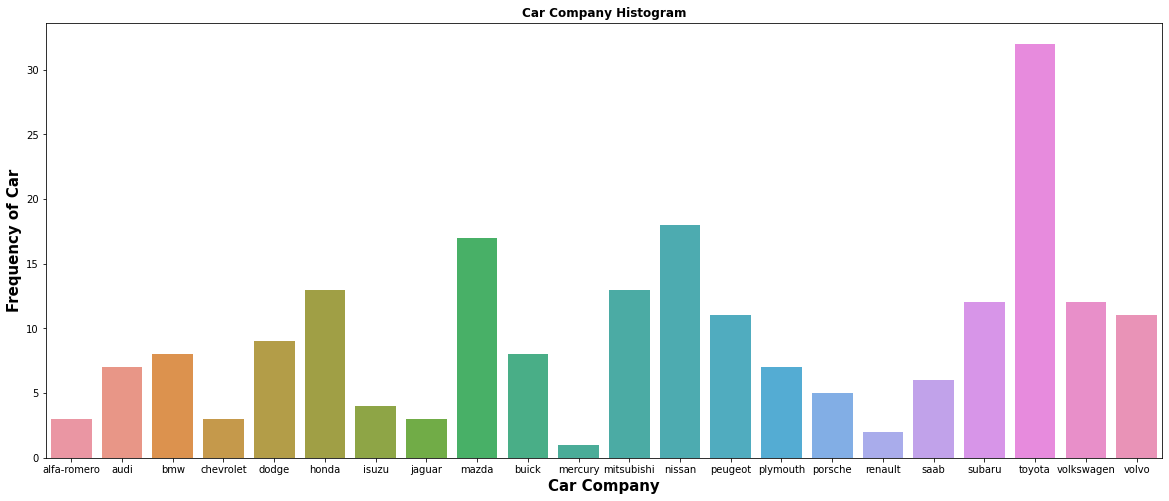

In [19]:
plt.figure(figsize=(20, 8))

sns.countplot(data.CompanyName)
plt.title('Car Company Histogram',fontweight='bold')
plt.ylabel('Frequency of Car',fontweight='bold',fontsize=15,)
plt.xlabel('Car Company',fontweight='bold',fontsize=15,)
plt.show()

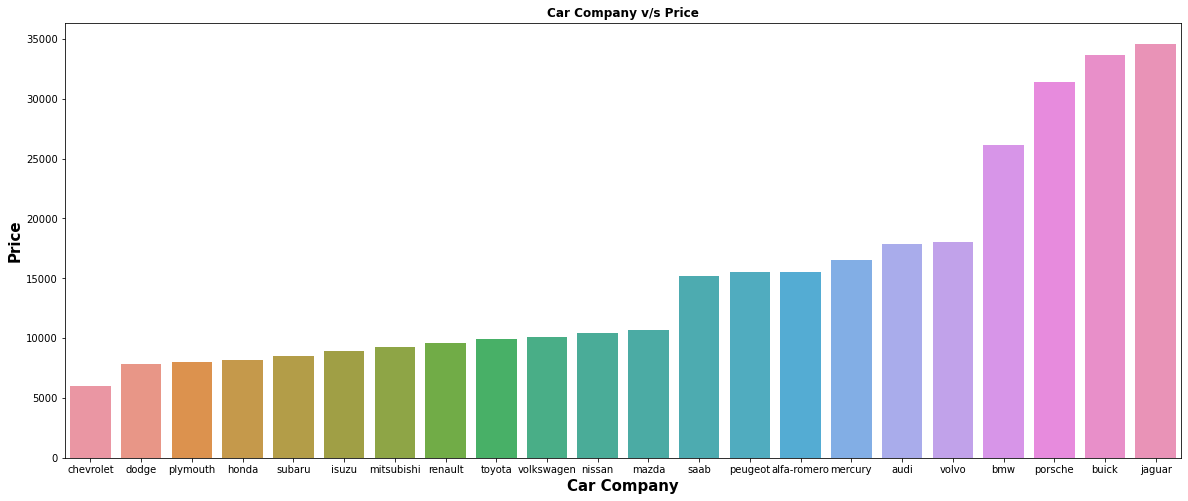

In [20]:
plt.figure(figsize=(20,8))
car_price = pd.DataFrame( data.groupby(by= 'CompanyName')['price'].mean().sort_values(ascending=True))
sns.barplot(car_price.index,car_price.price)
plt.title('Car Company v/s Price',fontweight='bold')
plt.ylabel('Price',fontweight='bold',fontsize=15,)
plt.xlabel('Car Company',fontweight='bold',fontsize=15,)
plt.show()

1.Jaguar Company's car have the highest price, but it's shale is the third lowest.
2. Toyota is the most favorite car company.


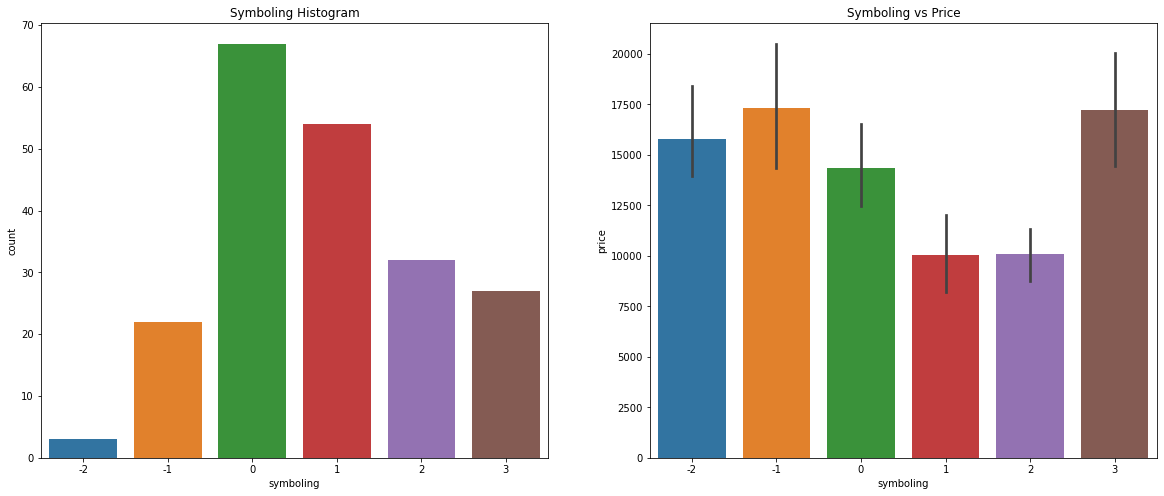

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.barplot(x= data.symboling, y = data.price)
plt.show()

1.symboling with 0 and 1 are most sold.
2.The cars with -1 symboling have a high price.
3.Symboling with 3 value has the similar price range to -2 value.

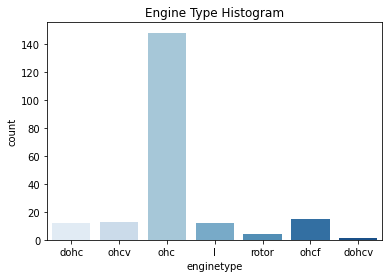

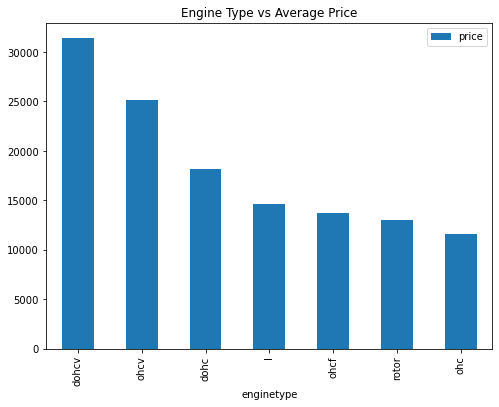

In [22]:


plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues"))
plt.show()
df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

1) ohc Engine type seems to be most favored type.
2) ohcv has the highest price range
3) ohc and ohcf have the low price range.

#### Data Conversion

In [23]:
data_numerical = data.select_dtypes( include= ['int64','float'])
numerical_col = data_numerical.columns.tolist()
numerical_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [24]:
data_categorical = data.select_dtypes(include= 'object')
categorical_col = data_categorical.columns.tolist()
categorical_col

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName']

Dummie variable

In [25]:
data_dummy = pd.get_dummies(data_categorical,drop_first=True)
data = data.drop(data[categorical_col],axis= 1)

In [26]:
data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [27]:
data = pd.concat([data,data_dummy],axis= 1)
data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


#### Scaling Features

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data[numerical_col] = sc.fit_transform(data[numerical_col])
data[numerical_col]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


In [29]:
x = data['enginesize']
y = data['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state= 100)
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     472.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           6.58e-50
Time:                        20:08:41   Log-Likelihood:                 151.33
No. Observations:                 164   AIC:                            -298.7
Df Residuals:                     162   BIC:                            -292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0719      0.014     -5.061      0.000      -0.100      -0.044
enginesize     1.1064      0.051     21.743      0.000       1.006       1.207
==============================================================================
Omnibus:                       27.981   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.794
Skew:                           0.905   Prob(JB):                     5.10e-10
Kurtosis:                       4.729   Cond. No.                         7.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train Test Split

In [30]:
y = data['price']
X = data.drop('price',axis=1)
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,...,0,0,0,0,0,0,0,0,0,0
3,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,...,0,0,0,0,0,0,0,0,0,0
4,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,...,0,0,0,0,0,0,0,0,0,1
201,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,...,0,0,0,0,0,0,0,0,0,1
202,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,...,0,0,0,0,0,0,0,0,0,1
203,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,...,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state= 100)

#### Model 1 (With all variable)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print("R_Squared:",r2_score(y_true=y_test, y_pred=y_pred))
print('accuracy:',lm.score(X_test,y_pred))

R_Squared: 0.8317639740326521
accuracy: 1.0


In [34]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr

In [35]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     64.56
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.04e-60
Time:                        20:08:41   Log-Likelihood:                 343.12
No. Observations:                 164   AIC:                            -560.2
Df Residuals:                     101   BIC:                            -364.9
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### Model 2
#### Apply REF

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)
X_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'CompanyName_bmw', 'CompanyName_porsche'],
      dtype='object')

In [37]:
x_train_r = X_train[X_train.columns[rfe.support_]]
x_train_r

,carwidth,curbweight,enginesize,boreratio,enginelocation_rear,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,CompanyName_bmw,CompanyName_porsche
3,0.491667,0.329325,0.181132,0.464286,0,0,0,0,0,0
157,0.341667,0.240884,0.139623,0.464286,0,0,0,0,0,0
81,0.425000,0.325834,0.230189,0.578571,0,0,0,0,0,0
32,0.308333,0.135376,0.067925,0.264286,0,0,0,0,0,0
99,0.408333,0.324282,0.222642,0.564286,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,0.425000,0.354926,0.184906,0.450000,0,0,0,0,0,0
103,0.516667,0.609775,0.452830,0.635714,0,0,0,0,0,0
67,0.833333,0.786268,0.460377,0.742857,0,0,0,0,0,0
24,0.291667,0.185803,0.109434,0.307143,0,0,0,0,0,0


In [38]:

X_train_sm = sm.add_constant(x_train_r)
lr = sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.56e-76
Time:                        20:08:42   Log-Likelihood:                 241.40
No. Observations:                 164   AIC:                            -460.8
Df Residuals:                     153   BIC:                            -426.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1274      0.017     -7.485      0.000      -0.161      -0.094
carwidth                  0.2806      0.052      5.357      0.000       0.177       0.384
curbweight                0.2909      0.067      4.338      0.000       0.158       0.423
enginesize                0.4978      0.082      6.085      0.000       0.336       0.659
boreratio                -0.1185      0.034     -3.506      0.001      -0.185      -0.052
enginelocation_rear       0.3271      0.062      5.310      0.000       0.205       0.449
enginetype_rotor          0.1384      0.032      4.293      0.000       0.075       0.202
cylindernumber_three      0.1595      0.059      2.703      0.008       0.043       0.276
cylindernumber_twelve    -0.0377      0.070     -0.538      0.591      -0.176       0.101
CompanyName_bmw           0.2238      0.025      8.816      0.000       0.174       0.274
CompanyName_porsche       0.1515      0.045      3.379      0.001       0.063       0.240
==============================================================================
Omnibus:                       15.058   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.545
Skew:                           0.515   Prob(JB):                     1.27e-05
Kurtosis:                       4.496   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value of "cylindernumber_three",'cylindernumber_twelve' are high so we have to drop it.

In [39]:
X_train_new = x_train_r.drop(["cylindernumber_three",'cylindernumber_twelve'], axis = 1)
X_train_new

,carwidth,curbweight,enginesize,boreratio,enginelocation_rear,enginetype_rotor,CompanyName_bmw,CompanyName_porsche
3,0.491667,0.329325,0.181132,0.464286,0,0,0,0
157,0.341667,0.240884,0.139623,0.464286,0,0,0,0
81,0.425000,0.325834,0.230189,0.578571,0,0,0,0
32,0.308333,0.135376,0.067925,0.264286,0,0,0,0
99,0.408333,0.324282,0.222642,0.564286,0,0,0,0
...,...,...,...,...,...,...,...,...
87,0.425000,0.354926,0.184906,0.450000,0,0,0,0
103,0.516667,0.609775,0.452830,0.635714,0,0,0,0
67,0.833333,0.786268,0.460377,0.742857,0,0,0,0
24,0.291667,0.185803,0.109434,0.307143,0,0,0,0


#### Model 3

In [40]:
def model(X,y):
    X_train_sm = sm.add_constant(X)
    lr = sm.OLS(y,X_train_sm).fit()
    return (lr.summary())

In [41]:
model(X_train_new,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.07e-77
Time:                        20:08:42   Log-Likelihood:                 237.45
No. Observations:                 164   AIC:                            -456.9
Df Residuals:                     155   BIC:                            -429.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1183      0.017     -6.965      0.000      -0.152      -0.085
carwidth                0.2619      0.053      4.964      0.000       0.158       0.366
curbweight              0.3057      0.066      4.639      0.000       0.176       0.436
enginesize              0.4768      0.071      6.757      0.000       0.337       0.616
boreratio              -0.1201      0.034     -3.504      0.001      -0.188      -0.052
enginelocation_rear     0.3217      0.062      5.162      0.000       0.199       0.445
enginetype_rotor        0.1342      0.032      4.197      0.000       0.071       0.197
CompanyName_bmw         0.2258      0.025      8.889      0.000       0.176       0.276
CompanyName_porsche     0.1597      0.045      3.515      0.001       0.070       0.249
==============================================================================
Omnibus:                       18.768   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.290
Skew:                           0.647   Prob(JB):                     1.19e-06
Kurtosis:                       4.523   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p_value of boreratio was high

In [42]:
X_train_new = X_train_new.drop('boreratio',axis = 1)

#### Model 4

In [43]:
model(X_train_new,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.36e-76
Time:                        20:08:42   Log-Likelihood:                 231.20
No. Observations:                 164   AIC:                            -446.4
Df Residuals:                     156   BIC:                            -421.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1568      0.013    -11.693      0.000      -0.183      -0.130
carwidth                0.2655      0.055      4.860      0.000       0.158       0.373
curbweight              0.2385      0.065      3.654      0.000       0.110       0.367
enginesize              0.4762      0.073      6.517      0.000       0.332       0.621
enginelocation_rear     0.3328      0.064      5.164      0.000       0.206       0.460
enginetype_rotor        0.1275      0.033      3.855      0.000       0.062       0.193
CompanyName_bmw         0.2236      0.026      8.504      0.000       0.172       0.276
CompanyName_porsche     0.1166      0.045      2.576      0.011       0.027       0.206
==============================================================================
Omnibus:                       11.200   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.120
Skew:                           0.488   Prob(JB):                      0.00142
Kurtosis:                       3.983   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check Multi-colinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    vif_data= pd.DataFrame()
    vif_data["features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                       for i in range(len(X.columns))]
    return(vif_data.sort_values('VIF',ascending= False))

In [45]:
vif(X_train_new)

,features,VIF
1,curbweight,37.614649
0,carwidth,19.840220
2,enginesize,18.547171
3,enginelocation_rear,2.151200
6,CompanyName_porsche,2.149417
4,enginetype_rotor,1.190706
5,CompanyName_bmw,1.128669


In [46]:
X_train_new = X_train_new.drop(['carwidth','carwidth','enginesize'],axis = 1)

model(X_train_new,y_train)

In [47]:
vif(X_train_new)

,features,VIF
4,CompanyName_porsche,2.052109
1,enginelocation_rear,2.000898
0,curbweight,1.129305
3,CompanyName_bmw,1.068267
2,enginetype_rotor,1.017703


In [48]:
model(X_train_new,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           4.15e-66
Time:                        20:08:42   Log-Likelihood:                 201.91
No. Observations:                 164   AIC:                            -391.8
Df Residuals:                     158   BIC:                            -373.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1210      0.013     -9.637      0.000      -0.146      -0.096
curbweight              0.7321      0.029     25.637      0.000       0.676       0.789
enginelocation_rear     0.3024      0.072      4.198      0.000       0.160       0.445
enginetype_rotor        0.0549      0.036      1.506      0.134      -0.017       0.127
CompanyName_bmw         0.2407      0.030      7.911      0.000       0.181       0.301
CompanyName_porsche     0.2071      0.052      4.011      0.000       0.105       0.309
==============================================================================
Omnibus:                       13.070   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.323
Skew:                           0.225   Prob(JB):                     1.58e-07
Kurtosis:                       5.093   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R squared and adjacent R squared are from 0.862 to 0.858.
2. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all
 the predictors are statistically significant.